In [2]:
from desc.objectives import ParticleTracer
from desc.grid import Grid
import desc.io
from desc.backend import jnp
import scipy.constants

DESC version 0+untagged.5762.g13200d9,using JAX backend, jax version=0.4.14, jaxlib version=0.4.14, dtype=float64
Using device: CPU, with 2.05 GB available memory


In [3]:
eq = desc.io.load("input.LandremanPaul2021_QA_scaled_output.h5")[-1]
eq._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq._current = None
# eq.solve()

In [4]:
# Energy and Mass info
Energy_eV = 3.52e6
Proton_Mass = scipy.constants.proton_mass
Proton_Charge = scipy.constants.elementary_charge

Energy_SI = Energy_eV*Proton_Charge

# Particle Info
Mass = 4*Proton_Mass
Charge = 2*Proton_Charge

# Initial State
psi_i = 0.2
zeta_i = 0
theta_i = 0
vpar_i = 0.3*jnp.sqrt(2*Energy_SI/Mass)
ini_cond = [float(psi_i), theta_i, zeta_i, float(vpar_i)]

# Time
tmin = 0
tmax = 1e-4
nt = 100
time = jnp.linspace(tmin, tmax, nt)

initial_conditions = ini_cond
Mass_Charge_Ratio = Mass/Charge

In [5]:
grid = Grid(jnp.array([jnp.sqrt(psi_i), theta_i, zeta_i]).T, jitable=True, sort=False)
data = eq.compute(["|B|", "R"], grid=grid)

mu = Energy_SI/(Mass*data["|B|"]) - (vpar_i**2)/(2*data["|B|"])

ini_param = [float(mu), Mass_Charge_Ratio]

objective = ParticleTracer(eq=eq, output_time=time, initial_conditions=ini_cond, initial_parameters=ini_param, compute_option="tracer", tolerance=1.4e-8)


In [6]:
print(f"Initial Velocity (parallel component): {vpar_i}")
print(f"Radius: {data['R']}")
print(f"Magnetic Field (abs): {data['|B|']}")
print(f"μ: {mu}")
print(f"Gyroradius: {Mass/Charge*jnp.sqrt(2*mu/data['|B|'])}") #GyroRadius
print(f"Gyrofrequency: {Charge*data['|B|']/Mass}") #Gyrofrequency

Initial Velocity (parallel component): 3895237.0555608957
Radius: [12.64247623]
Magnetic Field (abs): [5.78011483]
μ: [1.32708948e+13]
Gyroradius: [0.04474188]
Gyrofrequency: [2.76833778e+08]


In [7]:
eq = desc.io.load("input.nearaxis_6.82_output.h5")[-1]
eq._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq._current = None
# eq.solve()

In [8]:
# Energy and Mass info
Energy_eV = 3.52e7
Proton_Mass = scipy.constants.proton_mass
Proton_Charge = scipy.constants.elementary_charge

Energy_SI = Energy_eV*Proton_Charge

# Particle Info
Mass = 4*Proton_Mass
Charge = 2*Proton_Charge

# Initial State
psi_i = 0.6
zeta_i = 0
theta_i = 0
vpar_i = 0.3*jnp.sqrt(2*Energy_SI/Mass)
ini_cond = [float(psi_i), theta_i, zeta_i, float(vpar_i)]

# Time
tmin = 0
tmax = 1e-4
nt = 100
time = jnp.linspace(tmin, tmax, nt)

initial_conditions = ini_cond
Mass_Charge_Ratio = Mass/Charge

In [9]:
grid = Grid(jnp.array([jnp.sqrt(psi_i), theta_i, zeta_i]).T, jitable=True, sort=False)
data = eq.compute(["|B|", "R"], grid=grid)

mu = Energy_SI/(Mass*data["|B|"]) - (vpar_i**2)/(2*data["|B|"])

ini_param = [float(mu), Mass_Charge_Ratio]

objective = ParticleTracer(eq=eq, output_time=time, initial_conditions=ini_cond, initial_parameters=ini_param, compute_option="tracer", tolerance=1.4e-7)


In [10]:
print(f"Initial Velocity (parallel component): {vpar_i}")
print(f"Radius: {data['R']}")
print(f"Magnetic Field (abs): {data['|B|']}")
print(f"μ: {mu}")
print(f"Gyroradius: {Mass/Charge*jnp.sqrt(2*mu/data['|B|'])}") #GyroRadius
print(f"Gyrofrequency: {Charge*data['|B|']/Mass}") #Gyrofrequency

Initial Velocity (parallel component): 12317821.121860277
Radius: [10.55133009]
Magnetic Field (abs): [3.78318156]
μ: [2.02758696e+14]
Gyroradius: [0.21616906]
Gyrofrequency: [1.81192325e+08]


In [11]:
objective.build()
solution = objective.compute(*objective.xs(eq))

2023-10-08 04:10:46.277200: E external/xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module jit__odeint_wrapper] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-10-08 04:12:15.003941: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 3m28.72698208s

********************************
[Compiling module jit__odeint_wrapper] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


In [ ]:
def output_to_file(solution, name):
    list1 = solution[:, 0]
    list2 = solution[:, 1]
    list3 = solution[:, 2]
    list4 = solution[:, 3]

    combined_lists = zip(list1, list2, list3, list4)
    
    file_name = f'{name}.txt'

    with open(file_name, 'w') as file:        
        for row in combined_lists:
            row_str = '\t'.join(map(str, row))
            file.write(row_str + '\n')

output_to_file(solution=solution, name="comparison_output_nearaxis_6.82")

In [ ]:
print(solution)

[[ 5.00000000e-01  0.00000000e+00  0.00000000e+00  3.89523706e+06]
 [ 5.01313733e-01 -1.78229697e-01  2.93854501e-01  3.87984594e+06]
 [ 5.05236662e-01 -3.63631097e-01  6.03757307e-01  3.83337487e+06]
 [ 5.11686100e-01 -5.32917014e-01  9.40640492e-01  3.75581268e+06]
 [ 5.20516300e-01 -6.21830789e-01  1.30112220e+00  3.64765182e+06]
 [ 5.31526867e-01 -6.77969920e-01  1.66232591e+00  3.51079292e+06]
 [ 5.44509649e-01 -7.28688913e-01  1.99575698e+00  3.34720397e+06]
 [ 5.59218925e-01 -8.10553606e-01  2.28724502e+00  3.15733759e+06]
 [ 5.75379084e-01 -9.35014391e-01  2.53875213e+00  2.94353939e+06]
 [ 5.92717352e-01 -1.07294795e+00  2.75872968e+00  2.70868340e+06]
 [ 6.10974331e-01 -1.19254284e+00  2.95524719e+00  2.45555859e+06]
 [ 6.29917846e-01 -1.28187086e+00  3.13373870e+00  2.18719251e+06]
 [ 6.49356422e-01 -1.35024235e+00  3.29686858e+00  1.90652407e+06]
 [ 6.69142271e-01 -1.41067829e+00  3.44467397e+00  1.61499160e+06]
 [ 6.89176092e-01 -1.46620735e+00  3.57497650e+00  1.31489336e

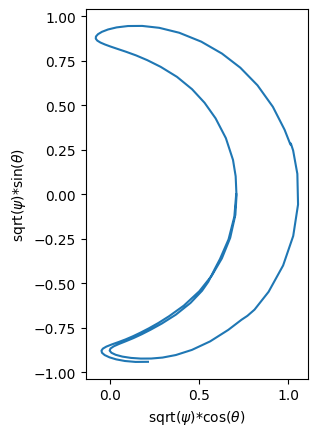

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

#create simple line plot

ax.plot(np.sqrt(solution[:, 0]) * np.cos(solution[:, 1]), np.sqrt(solution[:, 0]) * np.sin(solution[:, 1]))

#set aspect ratio to 1
ratio = 1.0
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect("equal", adjustable='box')

plt.xlabel(r'sqrt($\psi$)*cos($\theta$)')
plt.ylabel(r'sqrt($\psi$)*sin($\theta$)')
plt.show()

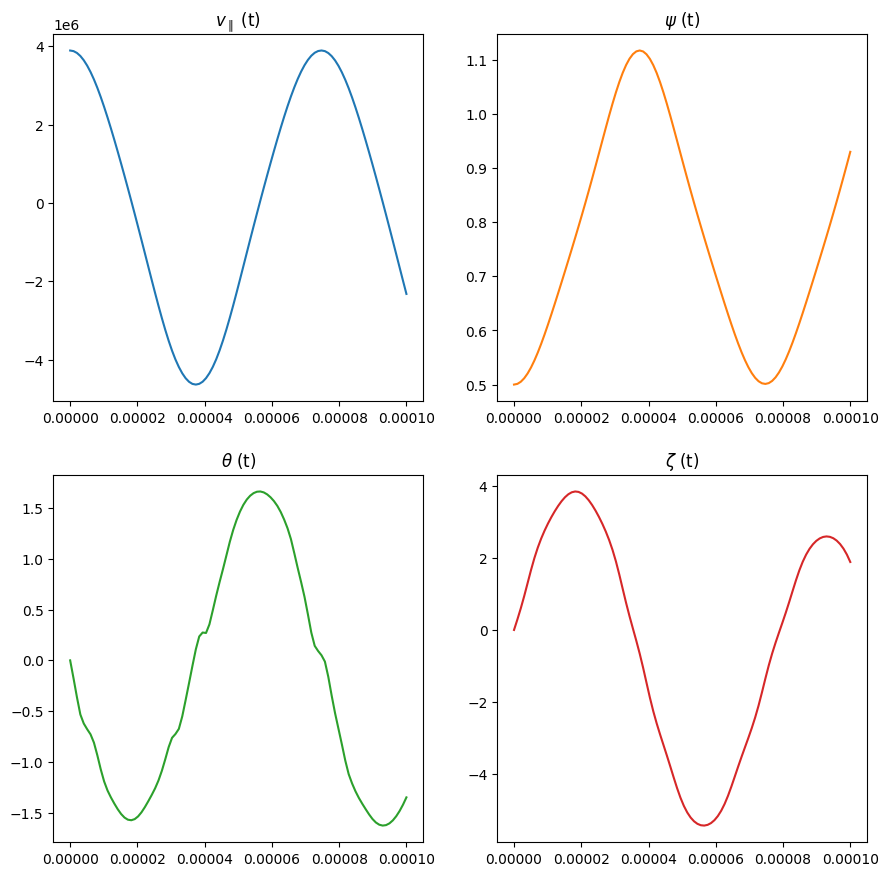

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 1].plot(time, solution[:, 0], 'tab:orange')
axs[0, 1].set_title(r'$\psi$ (t)')
axs[1, 0].plot(time, solution[:, 1], 'tab:green')
axs[1, 0].set_title(r'$\theta$ (t)')
axs[1, 1].plot(time, solution[:, 2], 'tab:red')
axs[1, 1].set_title(r'$\zeta$ (t)')
axs[0, 0].plot(time, solution[:, 3], 'tab:blue')
axs[0, 0].set_title(r"$v_{\parallel}$ (t)")

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

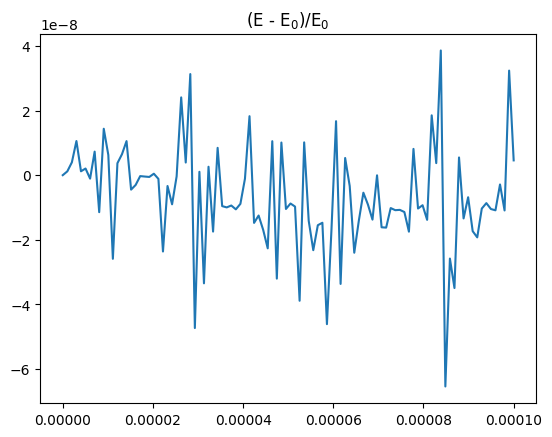

In [ ]:
grid = Grid(np.vstack((np.sqrt(solution[:, 0]), solution[:, 1], solution[:, 2])).T,sort=False)
B_field = eq.compute("|B|", grid=grid)
Energy = 0.5*(solution[:, 3]**2 + 2*B_field["|B|"]*mu)*Mass

plt.plot(time, (Energy-Energy_SI)/Energy_SI)
plt.title(r"(E - E$_0$)/E$_0$")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))